In [ ]:
import warnings, os
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
import gc

warnings.filterwarnings('ignore')

# Load - Metatrader

In [ ]:
Raw_MT5 = pd.read_csv('Storage/Metatrader_WIN.csv', parse_dates=['datetime'])
Raw_MT5['datetime'] = pd.to_datetime(Raw_MT5['datetime'], errors='coerce')
# Raw_MT5.head()

In [ ]:
def QUERY_SELECT_1(Raw_MT5, SYMBOLS, TFRAMES):
    return Raw_MT5[Raw_MT5['symbol'].isin(SYMBOLS) & Raw_MT5['tf'].isin(TFRAMES)] .reset_index(drop=1)

Query_MT5 = QUERY_SELECT_1(Raw_MT5, SYMBOLS=['WIN$','WIN$D','WIN$N'], TFRAMES=['M15'])
Query_MT5.head()

# Load - Investing

In [ ]:
Raw_Inv = pd.read_csv('Storage/Investing_WIN.csv', parse_dates=['Data'])
Raw_Inv.head()

In [ ]:
def QUERY_SELECT_2(Raw_Inv, MIN_DATE):
    return Raw_Inv[Raw_Inv['Data'] > MIN_DATE]

Query_Inv = QUERY_SELECT_2(Raw_Inv, MIN_DATE=Query_MT5['datetime'].min())
Query_Inv.head()

# Charts

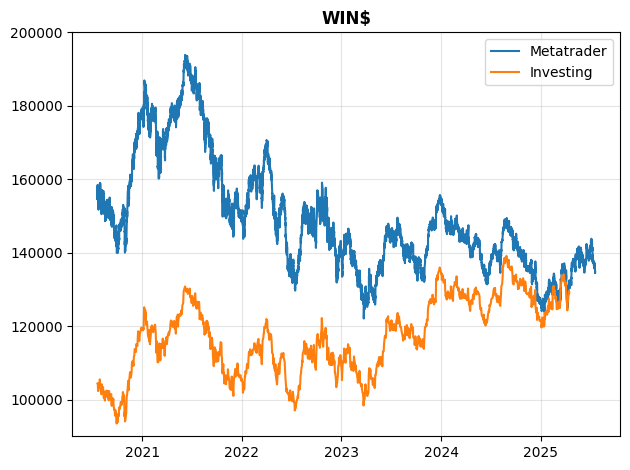

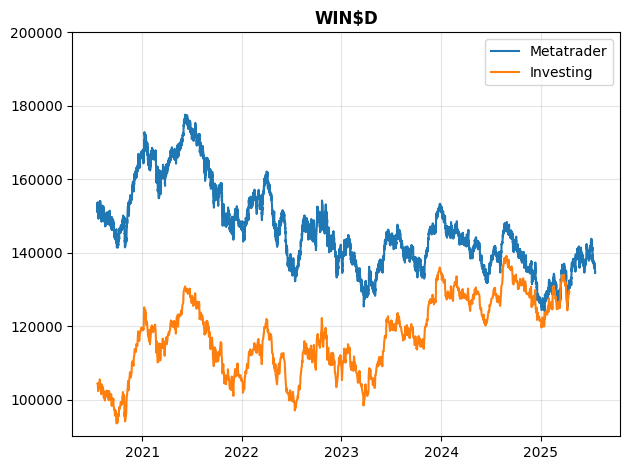

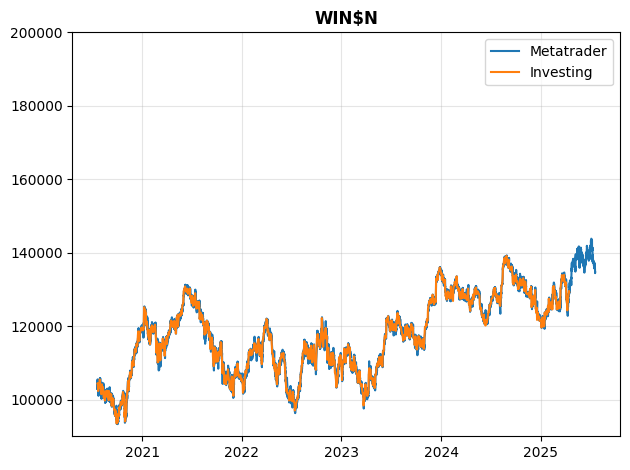

In [ ]:
for SYMBOL, Sec_MT5 in Query_MT5.groupby('symbol', sort=0):

    plt.title(f'{SYMBOL}', fontweight='bold')
    
    plt.plot(Sec_MT5['datetime'], Sec_MT5['close'], label='Metatrader') 
    plt.plot(Query_Inv['Data'], Query_Inv['Último'].mul(1000), label='Investing')

    plt.ylim(bottom=90_000, top=200_000)
    plt.grid(True, alpha=0.33)
    plt.legend()
    plt.tight_layout()
    plt.show()